# DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()
data = pd.read_csv('adult_with_headers.csv')

Saving adult_with_headers.csv to adult_with_headers (2).csv


## 1. Data Exploration and Preprocessing:

In [3]:
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education_num   32561 non-null  int64 
 5   marital_status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital_gain    32561 non-null  int64 
 11  capital_loss    32561 non-null  int64 
 12  hours_per_week  32561 non-null  int64 
 13  native_country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [5]:
data.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [6]:
data.duplicated().sum()

24

In [7]:
data.drop_duplicates(inplace = True)

In [8]:
data.drop('race', axis = 1, inplace = True)

In [9]:
data.index

Int64Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,
                9,
            ...
            32551, 32552, 32553, 32554, 32555, 32556, 32557, 32558, 32559,
            32560],
           dtype='int64', length=32537)

## 	Standard Scaling

In [10]:
num_cols = data.select_dtypes(include=['int64']).columns

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
scaler = StandardScaler()

In [13]:
data[num_cols] = scaler.fit_transform(data[num_cols])

In [14]:
data.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,Male,0.148292,-0.216743,-0.035664,United-States,<=50K
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,Male,-0.145975,-0.216743,-2.222483,United-States,<=50K


### Min-Max Scaling (Normalization)

#### When to Use: When we need all values between 0 and 1.
#### Why: Keeps the relationships between values intact while making sure no feature dominates due to large numbers.
#### Best For: Algorithms that rely on distance (e.g., KNN, SVM, Neural Networks).

### Standardization (Z-score Normalization)

#### When to Use: When data follows a normal (bell-shaped) distribution or we want a mean of 0 and standard deviation of 1.
#### Why: Makes sure all features contribute equally to the model, avoiding bias from large values.
#### Best For: Linear models like Linear Regression, Logistic Regression, PCA.

## 2. Encoding Techniques:

### Apply One-Hot Encoding to categorical variables with less than 5 categories

In [15]:
cat_cols = data.select_dtypes(include=['object'])

df_onehot = pd.get_dummies(
    data,
    columns=[col for col in cat_cols if data[col].nunique() < 5],  # Filter categorical columns
    dtype=int  # Ensure output is in integer format (0s and 1s)
)


In [16]:
df_onehot.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.030390,State-gov,-1.063569,Bachelors,1.134777,Never-married,Adm-clerical,Not-in-family,0.148292,-0.216743,-0.035664,United-States,0,1,1,0
1,0.836973,Self-emp-not-inc,-1.008668,Bachelors,1.134777,Married-civ-spouse,Exec-managerial,Husband,-0.145975,-0.216743,-2.222483,United-States,0,1,1,0


### Use Label Encoding for categorical variables with more than 5 categories.

In [17]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}

for col in cat_cols:
    if col in df_onehot.columns and df_onehot[col].dtype == 'object':
        if df_onehot[col].nunique() > 5:  # Check if the categorical column has more than 5 unique values
            le = LabelEncoder()
            df_onehot[col] = le.fit_transform(df_onehot[col])
            label_encoders[col] = le  # Store the encoder for inverse transformation if needed


In [18]:
df_onehot.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.148292,-0.216743,-0.035664,39,0,1,1,0
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.145975,-0.216743,-2.222483,39,0,1,1,0


### One-Hot Encoding
### Pros:
#### Makes sure the model doesn’t treat categories as numbers.
#### Best for categories that don’t have a specific order.

### Cons:
#### Can make the dataset bigger if there are many categories.
#### Can slow down training with large data.

### Label Encoding
### Pros:
#### Keeps the dataset smaller by using numbers.
#### Good when categories have a natural order (like low, medium, high).

### Cons:
#### Can cause problems if the categories don’t have a real order but are treated as numbers.

### When to use each?

#### One-Hot Encoding for categories with no order.
#### Label Encoding for ordered categories.








## 3. Feature Engineering:

### Create at least 2 new features that could be beneficial for the model

In [19]:
df_onehot['employment_duration'] = df_onehot['age'] - df_onehot['education_num'] - 6

In [20]:
df_onehot['capital_ratio'] = (df_onehot['capital_gain'] + 1) / (df_onehot['capital_loss'] + 1)

In [21]:
df_onehot

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,employment_duration,capital_ratio
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.148292,-0.216743,-0.035664,39,0,1,1,0,-7.104387,1.466048
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.145975,-0.216743,-2.222483,39,0,1,1,0,-6.297804,1.090351
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,-0.145975,-0.216743,-0.035664,39,0,1,1,0,-5.622257,1.090351
3,1.056950,4,0.425752,1,-1.198407,2,6,0,-0.145975,-0.216743,-0.035664,39,0,1,1,0,-3.744643,1.090351
4,-0.776193,4,1.408066,9,1.134777,2,10,5,-0.145975,-0.216743,-0.035664,5,1,0,1,0,-7.910970,1.090351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,-0.145975,-0.216743,-0.197650,39,1,0,1,0,-7.595432,1.090351
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,-0.145975,-0.216743,-0.035664,39,0,1,0,1,-5.475606,1.090351
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,-0.145975,-0.216743,-0.035664,39,1,0,1,0,-4.155742,1.090351
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,-0.145975,-0.216743,-1.655530,39,0,1,1,0,-6.795469,1.090351


In [22]:
correlation_duration = df_onehot[['age', 'education_num', 'employment_duration']].corr()

In [23]:
correlation_duration

,age,education_num,employment_duration
age,1.000000,0.036224,0.694182
education_num,0.036224,1.000000,-0.694182
employment_duration,0.694182,-0.694182,1.000000


In [24]:
correlation_ratio = df_onehot[['capital_gain', 'capital_loss', 'capital_ratio']].corr()

In [25]:
correlation_ratio

,capital_gain,capital_loss,capital_ratio
capital_gain,1.000000,-0.031639,0.988579
capital_loss,-0.031639,1.000000,-0.179892
capital_ratio,0.988579,-0.179892,1.000000


In [26]:
df_onehot

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,employment_duration,capital_ratio
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.148292,-0.216743,-0.035664,39,0,1,1,0,-7.104387,1.466048
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.145975,-0.216743,-2.222483,39,0,1,1,0,-6.297804,1.090351
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,-0.145975,-0.216743,-0.035664,39,0,1,1,0,-5.622257,1.090351
3,1.056950,4,0.425752,1,-1.198407,2,6,0,-0.145975,-0.216743,-0.035664,39,0,1,1,0,-3.744643,1.090351
4,-0.776193,4,1.408066,9,1.134777,2,10,5,-0.145975,-0.216743,-0.035664,5,1,0,1,0,-7.910970,1.090351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,-0.145975,-0.216743,-0.197650,39,1,0,1,0,-7.595432,1.090351
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,-0.145975,-0.216743,-0.035664,39,0,1,0,1,-5.475606,1.090351
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,-0.145975,-0.216743,-0.035664,39,1,0,1,0,-4.155742,1.090351
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,-0.145975,-0.216743,-1.655530,39,0,1,1,0,-6.795469,1.090351


### Feature 1: Employment Duration

#### -> This feature estimates how long a person has been working.
#### -> It is calculated as Age - Years of Education - 6 (assuming school starts at age 6).
#### -> More work experience usually leads to higher income.
#### -> It combines age and education to give a better measure of experience.
#### -> Helps the model understand career progression and salary growth.

### Feature 2: Capital Gain/Loss Ratio

#### -> This feature measures a person’s financial stability.
#### -> It is calculated as (Capital Gain + 1) / (Capital Loss + 1) to avoid division by zero.
#### -> A higher ratio means more income from investments, indicating stability.
#### -> A lower ratio suggests financial struggles with more losses than gains.
#### -> Helps the model assess financial health beyond salary earnings.

### Apply a transformation (e.g., log transformation) to at least one skewed numerical feature

In [27]:
df_onehot

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,employment_duration,capital_ratio
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.148292,-0.216743,-0.035664,39,0,1,1,0,-7.104387,1.466048
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.145975,-0.216743,-2.222483,39,0,1,1,0,-6.297804,1.090351
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,-0.145975,-0.216743,-0.035664,39,0,1,1,0,-5.622257,1.090351
3,1.056950,4,0.425752,1,-1.198407,2,6,0,-0.145975,-0.216743,-0.035664,39,0,1,1,0,-3.744643,1.090351
4,-0.776193,4,1.408066,9,1.134777,2,10,5,-0.145975,-0.216743,-0.035664,5,1,0,1,0,-7.910970,1.090351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,-0.145975,-0.216743,-0.197650,39,1,0,1,0,-7.595432,1.090351
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,-0.145975,-0.216743,-0.035664,39,0,1,0,1,-5.475606,1.090351
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,-0.145975,-0.216743,-0.035664,39,1,0,1,0,-4.155742,1.090351
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,-0.145975,-0.216743,-1.655530,39,0,1,1,0,-6.795469,1.090351


In [28]:
df_onehot.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'capital_gain',
       'capital_loss', 'hours_per_week', 'native_country', 'sex_ Female',
       'sex_ Male', 'income_ <=50K', 'income_ >50K', 'employment_duration',
       'capital_ratio'],
      dtype='object')

In [29]:
df_onehot['capital_gain'] = np.log1p(df_onehot['capital_gain'])

In [30]:
df_onehot

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,employment_duration,capital_ratio
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.138275,-0.216743,-0.035664,39,0,1,1,0,-7.104387,1.466048
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.157795,-0.216743,-2.222483,39,0,1,1,0,-6.297804,1.090351
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,-0.157795,-0.216743,-0.035664,39,0,1,1,0,-5.622257,1.090351
3,1.056950,4,0.425752,1,-1.198407,2,6,0,-0.157795,-0.216743,-0.035664,39,0,1,1,0,-3.744643,1.090351
4,-0.776193,4,1.408066,9,1.134777,2,10,5,-0.157795,-0.216743,-0.035664,5,1,0,1,0,-7.910970,1.090351
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,-0.157795,-0.216743,-0.197650,39,1,0,1,0,-7.595432,1.090351
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,-0.157795,-0.216743,-0.035664,39,0,1,0,1,-5.475606,1.090351
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,-0.157795,-0.216743,-0.035664,39,1,0,1,0,-4.155742,1.090351
32559,-1.216148,4,0.110930,11,-0.420679,4,1,3,-0.157795,-0.216743,-1.655530,39,0,1,1,0,-6.795469,1.090351


#### The log transformation was applied to the capital_gain feature because it had many small values and a few very large ones. This made the data uneven. By using the log, the large values are reduced, and the data becomes more even, which makes it easier for models to work with.

In [31]:

outliers = {}

for col in df_onehot:
    Q1 = df_onehot[col].quantile(0.25)
    Q3 = df_onehot[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers[col] = df_onehot[(df_onehot[col] < lower_limit) | (df_onehot[col] > upper_limit)].shape[0]


In [32]:
outliers

{'age': 165,
 'workclass': 9864,
 'fnlwgt': 993,
 'education': 3039,
 'education_num': 1193,
 'marital_status': 0,
 'occupation': 0,
 'relationship': 0,
 'capital_gain': 2712,
 'capital_loss': 1519,
 'hours_per_week': 9002,
 'native_country': 3384,
 'sex_ Female': 0,
 'sex_ Male': 0,
 'income_ <=50K': 7839,
 'income_ >50K': 7839,
 'employment_duration': 699,
 'capital_ratio': 4231}

## 4. Feature Selection:

### Use the Isolation Forest algorithm to identify and remove outliers

In [33]:
from sklearn.ensemble import IsolationForest

In [34]:
forest = IsolationForest(contamination = 0.04)

In [35]:
forest.fit(df_onehot)

IsolationForest(contamination=0.04)

In [36]:
predict_outliers = forest.predict(df_onehot)

In [37]:
predict_outliers

array([ 1,  1,  1, ...,  1,  1, -1])

In [38]:
data_anomaly = df_onehot.copy()

In [39]:
data_anomaly.head(2)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,employment_duration,capital_ratio
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.138275,-0.216743,-0.035664,39,0,1,1,0,-7.104387,1.466048
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.157795,-0.216743,-2.222483,39,0,1,1,0,-6.297804,1.090351


In [40]:
data_anomaly['anomaly']=forest.predict(df_onehot.iloc[:,0:19])

In [41]:
data_anomaly.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,employment_duration,capital_ratio,anomaly
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.138275,-0.216743,-0.035664,39,0,1,1,0,-7.104387,1.466048,1
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.157795,-0.216743,-2.222483,39,0,1,1,0,-6.297804,1.090351,1
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,-0.157795,-0.216743,-0.035664,39,0,1,1,0,-5.622257,1.090351,1
3,1.056950,4,0.425752,1,-1.198407,2,6,0,-0.157795,-0.216743,-0.035664,39,0,1,1,0,-3.744643,1.090351,1
4,-0.776193,4,1.408066,9,1.134777,2,10,5,-0.157795,-0.216743,-0.035664,5,1,0,1,0,-7.910970,1.090351,1


In [42]:
data_anomaly[data_anomaly['anomaly']==-1]

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,employment_duration,capital_ratio,anomaly
8,-0.556216,4,-1.364218,12,1.523641,4,10,1,1.015375,-0.216743,0.774269,39,1,0,0,1,-8.079857,3.524258,-1
52,0.616996,4,-1.306864,14,1.912505,2,10,5,-0.157795,4.501740,1.584202,16,1,0,0,1,-7.295509,0.155228,-1
61,-0.482890,0,0.986740,5,-2.364998,3,0,1,-0.157795,-0.216743,-0.035664,0,0,1,1,0,-4.117892,1.090351,-1
84,0.397019,4,1.457159,11,-0.420679,0,3,1,1.028044,-0.216743,-0.035664,39,1,0,0,1,-5.182303,3.569190,-1
93,-0.629542,4,-0.682431,11,-0.420679,2,12,5,-0.157795,3.685557,-0.440630,0,1,0,1,0,-6.208863,0.182267,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32518,1.350253,2,-0.751873,11,-0.420679,2,3,0,2.666508,-0.216743,-0.035664,39,0,1,0,1,-4.229068,18.371545,-1
32525,3.110071,0,-0.656558,8,0.357049,0,0,4,-0.157795,-0.216743,-3.194403,0,1,0,1,0,-3.246978,1.090351,-1
32530,-0.262913,0,1.234459,9,1.134777,2,0,5,-0.157795,-0.216743,1.179236,39,1,0,0,1,-7.397690,1.090351,-1
32538,-0.042936,4,-0.479380,9,1.134777,0,10,4,1.060250,-0.216743,0.369303,39,1,0,0,1,-7.177713,3.686012,-1


In [43]:
data_anomaly = data_anomaly.drop(data_anomaly[data_anomaly['anomaly'] == -1].index)

In [44]:
data_anomaly

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,capital_gain,capital_loss,hours_per_week,native_country,sex_ Female,sex_ Male,income_ <=50K,income_ >50K,employment_duration,capital_ratio,anomaly
0,0.030390,7,-1.063569,9,1.134777,4,1,1,0.138275,-0.216743,-0.035664,39,0,1,1,0,-7.104387,1.466048,1
1,0.836973,6,-1.008668,9,1.134777,2,4,0,-0.157795,-0.216743,-2.222483,39,0,1,1,0,-6.297804,1.090351,1
2,-0.042936,4,0.245040,11,-0.420679,0,6,1,-0.157795,-0.216743,-0.035664,39,0,1,1,0,-5.622257,1.090351,1
3,1.056950,4,0.425752,1,-1.198407,2,6,0,-0.157795,-0.216743,-0.035664,39,0,1,1,0,-3.744643,1.090351,1
4,-0.776193,4,1.408066,9,1.134777,2,10,5,-0.157795,-0.216743,-0.035664,5,1,0,1,0,-7.910970,1.090351,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,-1.216148,4,1.140366,15,-0.031815,4,11,1,-0.157795,-0.216743,-0.035664,39,0,1,1,0,-7.184333,1.090351,1
32556,-0.849519,4,0.639678,7,0.745913,2,13,5,-0.157795,-0.216743,-0.197650,39,1,0,1,0,-7.595432,1.090351,1
32557,0.103716,4,-0.335436,11,-0.420679,2,7,0,-0.157795,-0.216743,-0.035664,39,0,1,0,1,-5.475606,1.090351,1
32558,1.423579,4,-0.358779,11,-0.420679,6,1,4,-0.157795,-0.216743,-0.035664,39,1,0,1,0,-4.155742,1.090351,1


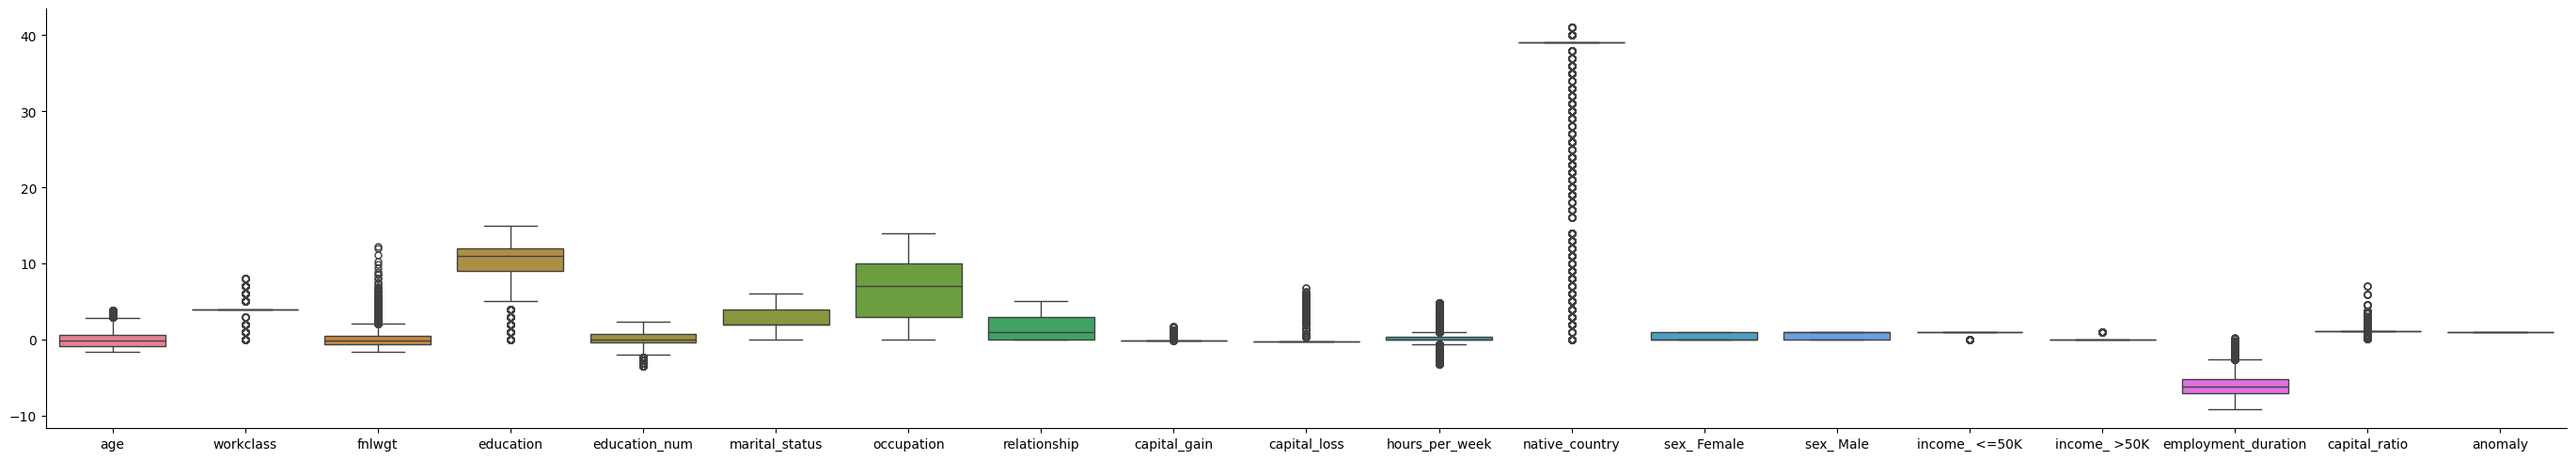

In [45]:
sns.catplot(data_anomaly, kind = 'box', aspect = 5.5, height = 5)
plt.show()

In [46]:

outliers = {}

for col in data_anomaly:
    Q1 = data_anomaly[col].quantile(0.25)
    Q3 = data_anomaly[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    outliers[col] = data_anomaly[(data_anomaly[col] < lower_limit) | (data_anomaly[col] > upper_limit)].shape[0]


In [47]:
outliers

{'age': 126,
 'workclass': 9111,
 'fnlwgt': 945,
 'education': 2852,
 'education_num': 1052,
 'marital_status': 0,
 'occupation': 0,
 'relationship': 0,
 'capital_gain': 2085,
 'capital_loss': 1130,
 'hours_per_week': 8418,
 'native_country': 3062,
 'sex_ Female': 0,
 'sex_ Male': 0,
 'income_ <=50K': 6961,
 'income_ >50K': 6961,
 'employment_duration': 642,
 'capital_ratio': 3215,
 'anomaly': 0}

### Outliers can affect model performance by:
#### Reducing accuracy: They can confuse the model, leading to less accurate predictions.
#### Distorting averages: Outliers can skew the mean, making it less representative of the data.
#### Slowing down learning: The model might focus too much on outliers, making it take longer to train.
#### Causing overfitting: The model may become too tailored to the outliers, leading to poor generalization on new data.

### Apply the PPS (Predictive Power Score) to find and discuss the relationships between features.

In [48]:
!pip install ppscore

PPS Matrix:
 x                         age  anomaly  capital_gain  capital_loss  \
y                                                                    
age                  1.000000      0.0      0.000000           0.0   
anomaly              0.000000      1.0      0.000000           0.0   
capital_gain         0.000000      0.0      1.000000           0.0   
capital_loss         0.000000      0.0      0.000000           1.0   
capital_ratio        0.000000      0.0      0.416101           0.0   
education            0.000000      0.0      0.000000           0.0   
education_num        0.000000      0.0      0.000000           0.0   
employment_duration  0.294235      0.0      0.000000           0.0   
fnlwgt               0.000000      0.0      0.000000           0.0   
hours_per_week       0.000000      0.0      0.000000           0.0   
income_ <=50K        0.000000      0.0      0.000000           0.0   
income_ >50K         0.000000      0.0      0.000000           0.0   
marital

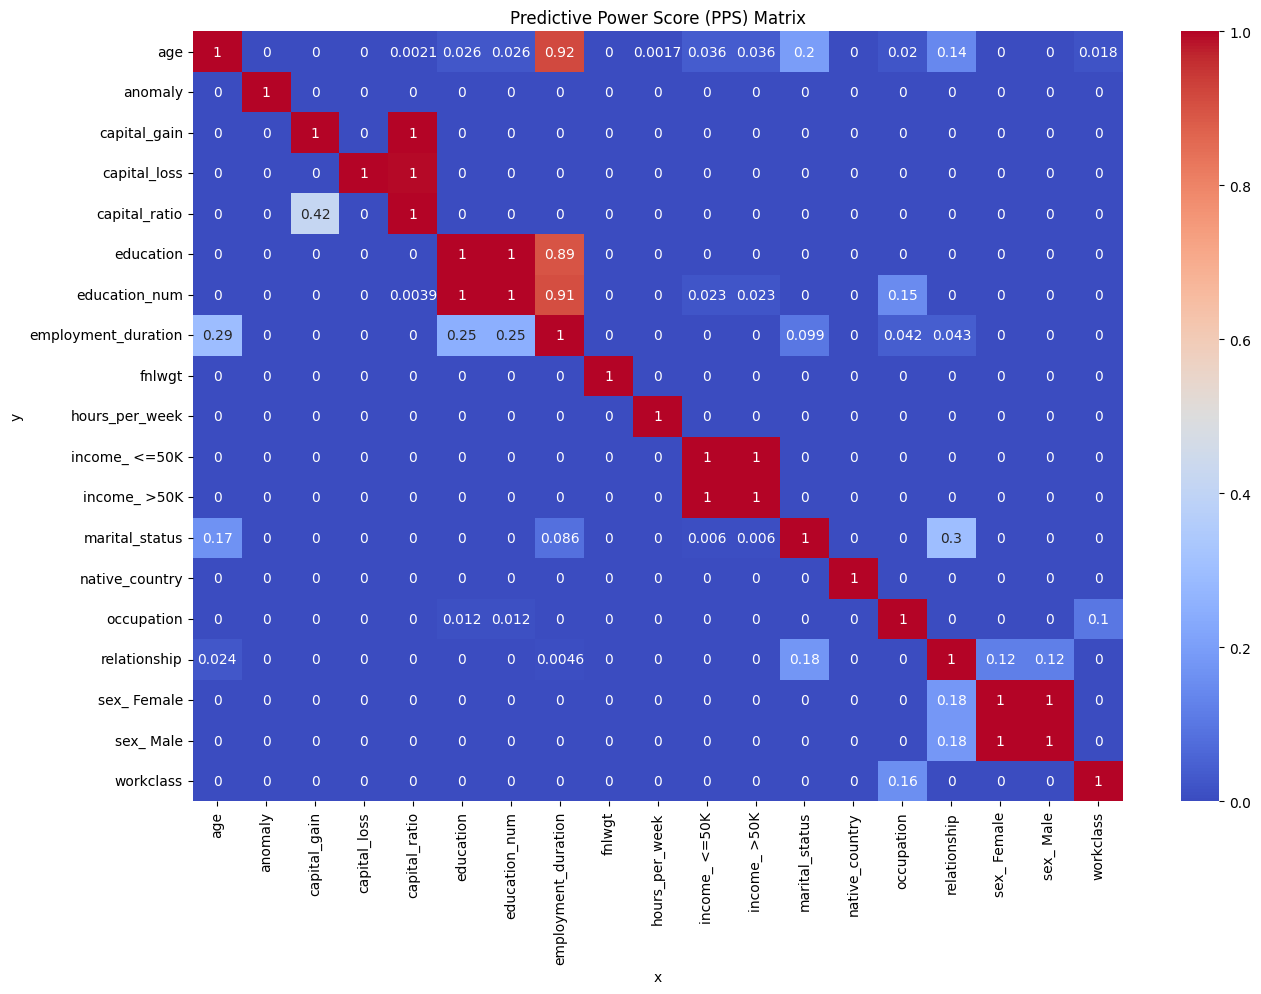

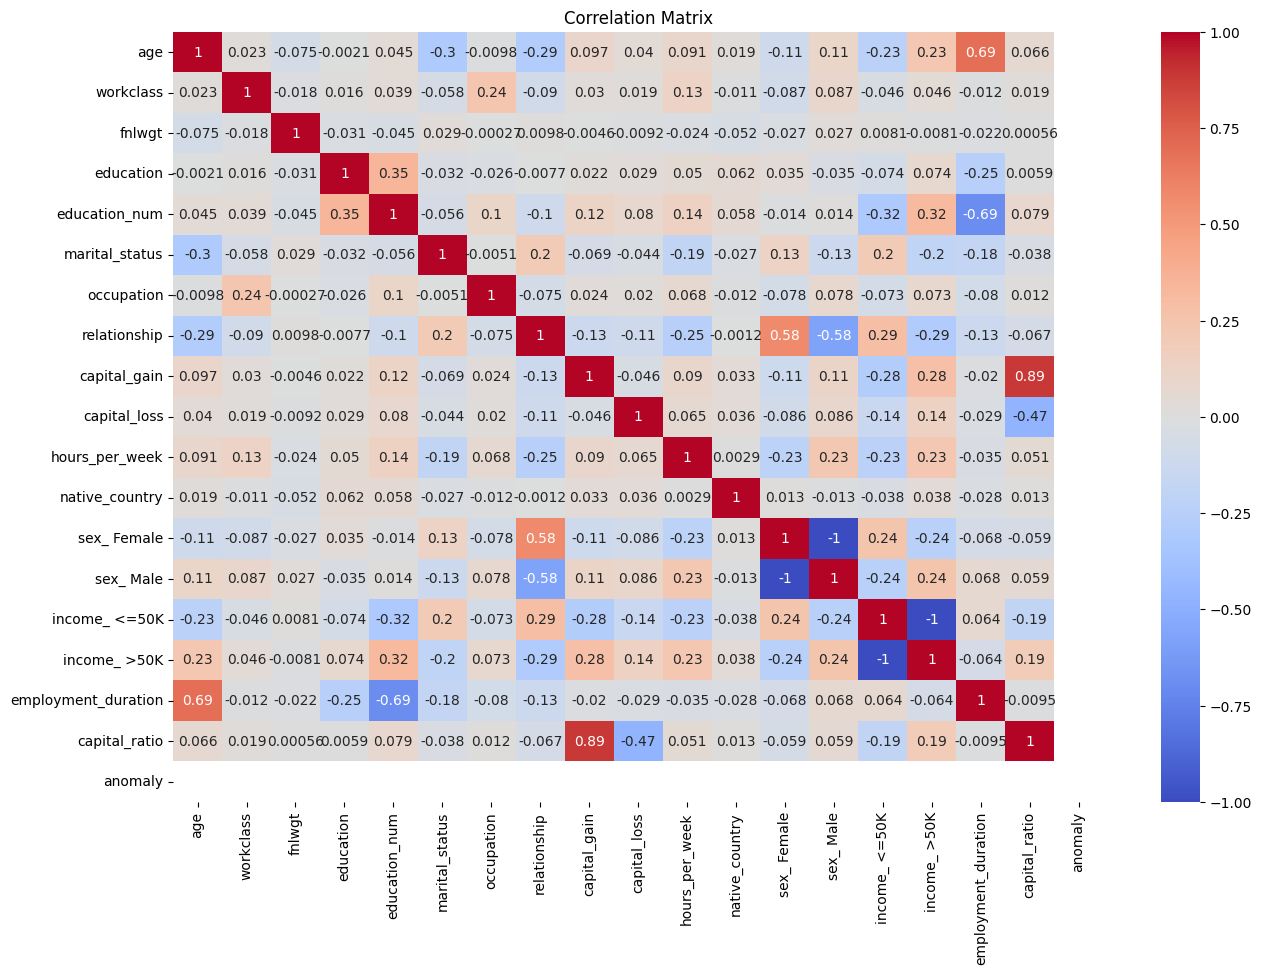

Preprocessing completed. Processed dataset saved as 'processed_adult.csv'.


In [51]:
import ppscore as pps

# Compute PPS matrix
pps_matrix = pps.matrix(data_anomaly)[['x', 'y', 'ppscore']].pivot(columns='x', index='y', values='ppscore')

# Compute Correlation matrix
correlation_matrix = data_anomaly.corr()

# Display PPS matrix
print("PPS Matrix:\n", pps_matrix)

# Display Correlation matrix
print("Correlation Matrix:\n", correlation_matrix)

# Plot PPS Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(pps_matrix, cmap="coolwarm", annot=True)
plt.title("Predictive Power Score (PPS) Matrix")
plt.show()

# Plot Correlation Heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, cmap="coolwarm", annot=True)
plt.title("Correlation Matrix")
plt.show()

# Save cleaned dataset
data_anomaly.to_csv("processed_adult.csv", index=False)
print("Preprocessing completed. Processed dataset saved as 'processed_adult.csv'.")


In [52]:
processed_data = pd.read_csv('processed_adult.csv')

print(processed_data.head())


        age  workclass    fnlwgt  education  education_num  marital_status  \
0  0.030390          7 -1.063569          9       1.134777               4   
1  0.836973          6 -1.008668          9       1.134777               2   
2 -0.042936          4  0.245040         11      -0.420679               0   
3  1.056950          4  0.425752          1      -1.198407               2   
4 -0.776193          4  1.408066          9       1.134777               2   

   occupation  relationship  capital_gain  capital_loss  hours_per_week  \
0           1             1      0.138275     -0.216743       -0.035664   
1           4             0     -0.157795     -0.216743       -2.222483   
2           6             1     -0.157795     -0.216743       -0.035664   
3           6             0     -0.157795     -0.216743       -0.035664   
4          10             5     -0.157795     -0.216743       -0.035664   

   native_country  sex_ Female  sex_ Male  income_ <=50K  income_ >50K  \
0     

### PPS Matrix:
#### Measures how well one feature predicts another.
#### Ranges from 0 (no prediction) to 1 (perfect prediction).
#### Captures both linear and non-linear relationships.

### Correlation Matrix:
#### Measures the linear relationship between features.
#### Ranges from -1 (perfect negative) to 1 (perfect positive).
#### Only captures linear relationships.

### Key Difference:
#### PPS considers both linear and non-linear relationships, while correlation only looks at linear ones.